In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir("/kaggle/input/chest-xray-pneumonia")

['chest_xray']

In [2]:
len(os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"))

3875

# Data Visualization

Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


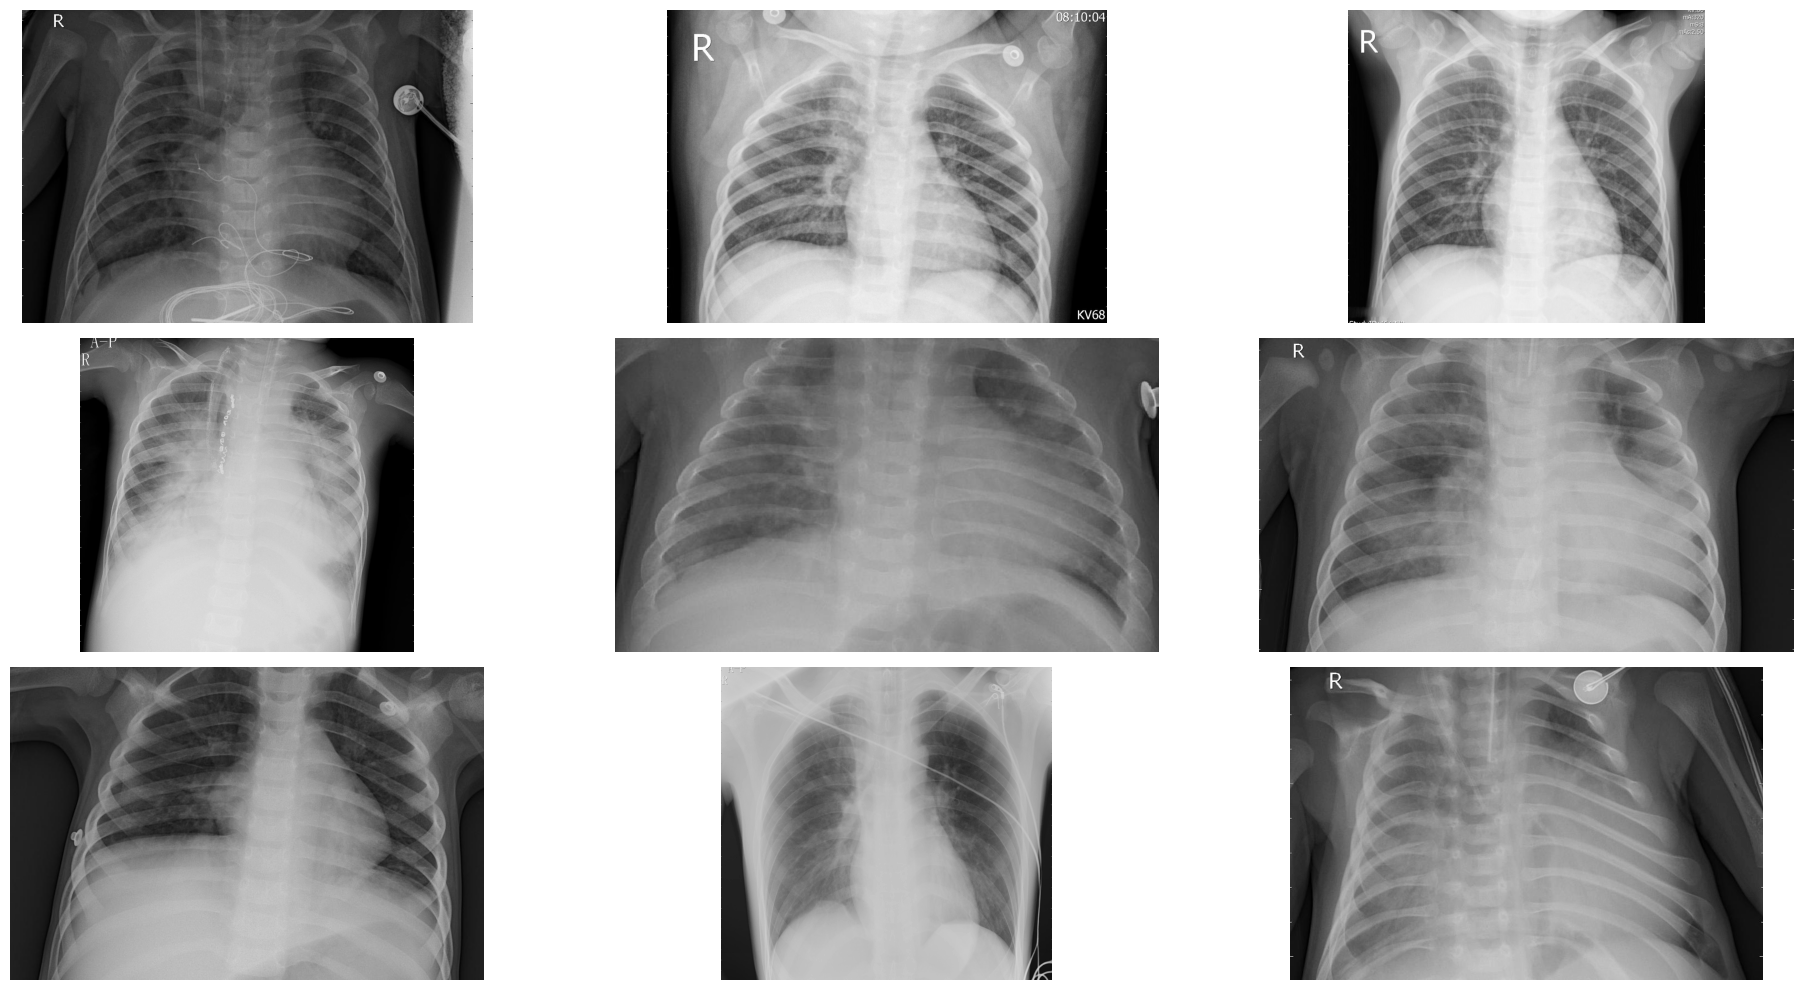

In [3]:
train_dir = "../input/chest-xray-pneumonia/chest_xray/train"
test_dir = "../input/chest-xray-pneumonia/chest_xray/test"
val_dir = "../input/chest-xray-pneumonia/chest_xray/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA")
pneumonia_dir = "../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

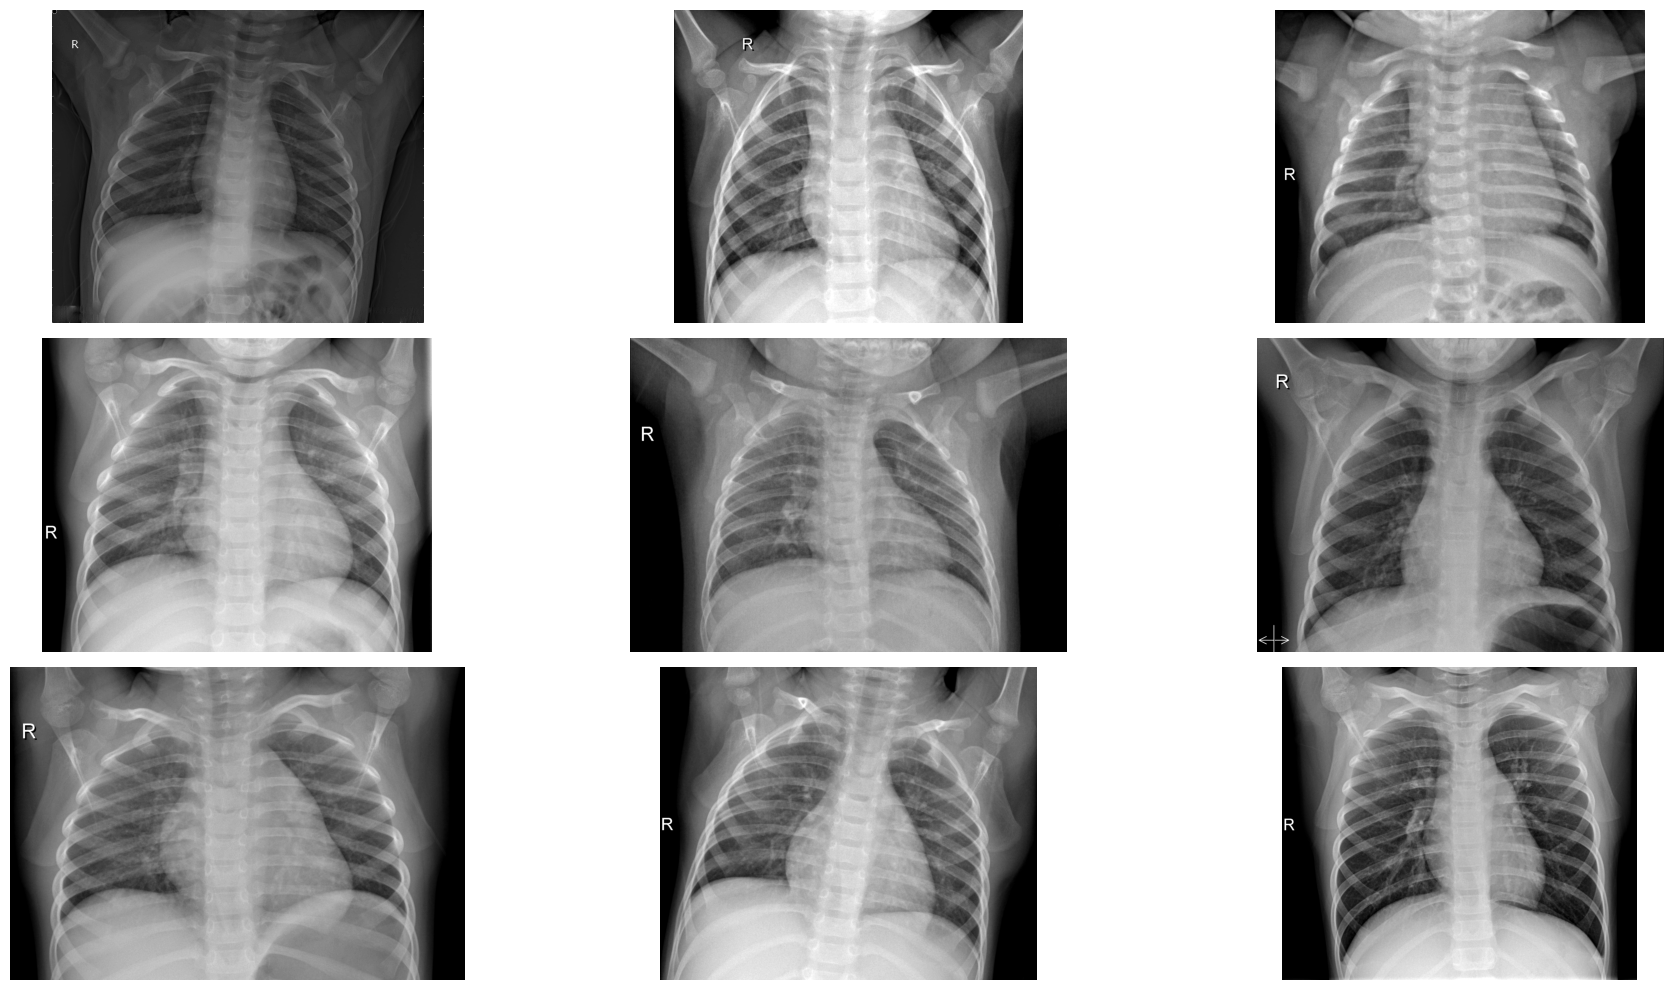

In [4]:
normal = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL")
normal_dir = "../input/chest-xray-pneumonia/chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 1128 pixels width and 1336 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 73.2978 and the standard deviation is 38.1653


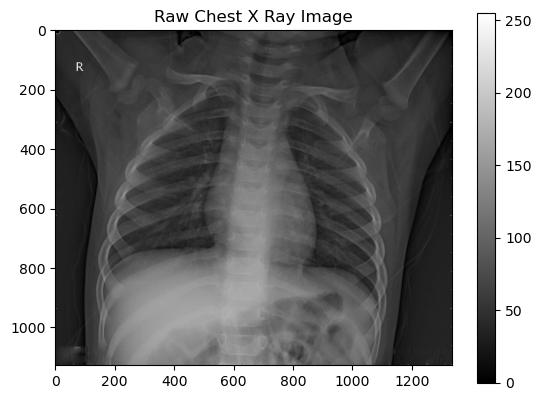

In [5]:
normal_img = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL")[0]
normal_dir = "../input/chest-xray-pneumonia/chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Investiagate pixel value distribution

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Text(0, 0.5, '# Pixels in Image')

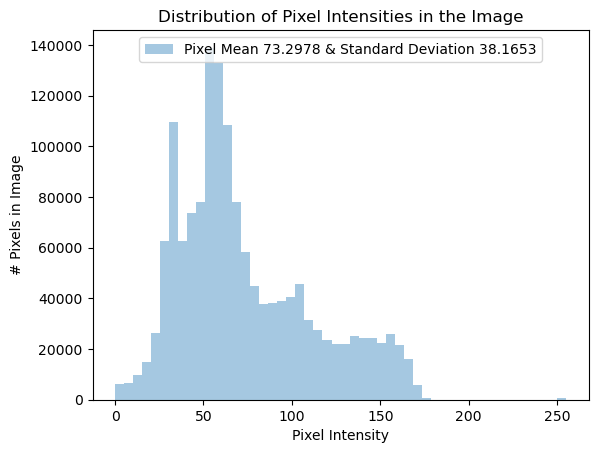

In [6]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# Image Preprocessing

In [7]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Build a Separate generator for valid and test sets

In [8]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 2.4274 and the minimum is -4.1341
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


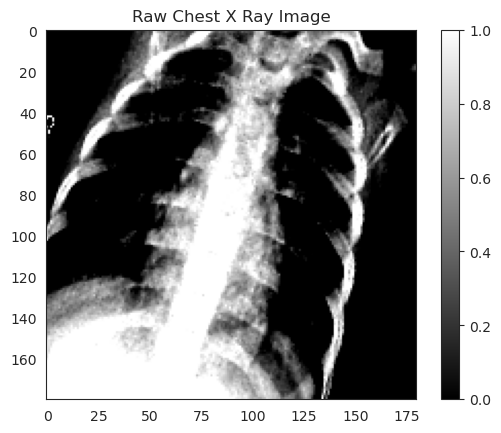

In [9]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Text(0, 0.5, '# Pixels in Image')

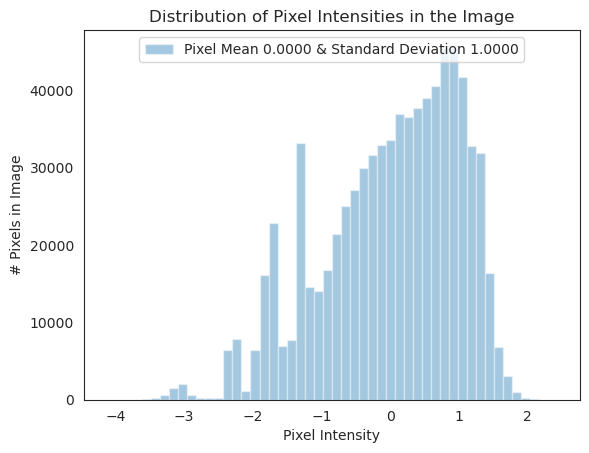

In [10]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# Building a CNN model
**Impact of imbalance data on loss function**

In [11]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 178, 178, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 176, 176, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                        

In [14]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - 38s 231ms/step - loss: 0.9395 - accuracy: 0.7200 - val_loss: 9.8617 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 23s 226ms/step - loss: 0.2280 - accuracy: 0.8200
Epoch 3/10
100/100 [==============================] - 23s 234ms/step - loss: 0.1156 - accuracy: 0.8913
Epoch 4/10
100/100 [==============================] - 21s 208ms/step - loss: 0.1285 - accuracy: 0.8800
Epoch 5/10
100/100 [==============================] - 21s 207ms/step - loss: 0.1056 - accuracy: 0.8963
Epoch 6/10
100/100 [==============================] - 20s 196ms/step - loss: 0.0865 - accuracy: 0.9013
Epoch 7/10
100/100 [==============================] - 20s 200ms/step - loss: 0.1037 - accuracy: 0.8913
Epoch 8/10
100/100 [==============================] - 20s 198ms/step - loss: 0.1017 - accuracy: 0.9175
Epoch 9/10
100/100 [==============================] - 20s 195ms/step - loss: 0.1008 - accuracy: 0.9100
Epoch 10/10
100/100 [==========

Text(0.5, 1.0, 'Accuracy Evolution')

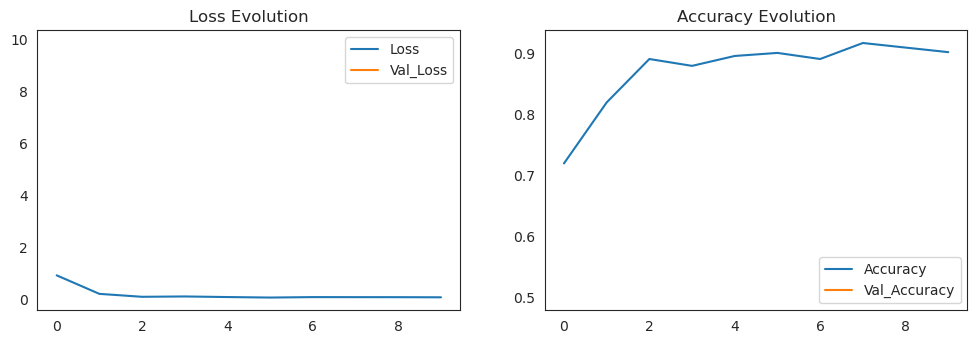

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [16]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 18s 28ms/step - loss: 0.9937 - accuracy: 0.5705
Test Accuracy: 57.05%
652/652 [==============================] - 119s 183ms/step - loss: 1.0083 - accuracy: 0.5600
Train Accuracy: 56.00%


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

624/624 [==============================] - 13s 21ms/step
[[212  22]
 [246 144]]


0           1  accuracy   macro avg  weighted avg
precision    0.462882    0.867470  0.570513    0.665176      0.715749
recall       0.905983    0.369231  0.570513    0.637607      0.570513
f1-score     0.612717    0.517986  0.570513    0.565351      0.553510
support    234.000000  390.000000  0.570513  624.000000    624.000000

In [18]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[219  15]
 [317  73]]


0           1  accuracy   macro avg  weighted avg
precision    0.408582    0.829545  0.467949    0.619064      0.671684
recall       0.935897    0.187179  0.467949    0.561538      0.467949
f1-score     0.568831    0.305439  0.467949    0.437135      0.404211
support    234.000000  390.000000  0.467949  624.000000    624.000000

# Tranfer Learning
# DenseNet

In [19]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormali

In [20]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [21]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [22]:
#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [23]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - 89s 227ms/step - loss: 0.2024 - accuracy: 0.8087 - val_loss: 7.6793 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 20s 202ms/step - loss: 0.1150 - accuracy: 0.8825
Epoch 3/10
100/100 [==============================] - 20s 197ms/step - loss: 0.0947 - accuracy: 0.8975
Epoch 4/10
100/100 [==============================] - 20s 197ms/step - loss: 0.0920 - accuracy: 0.8963
Epoch 5/10
100/100 [==============================] - 20s 198ms/step - loss: 0.0961 - accuracy: 0.8913
Epoch 6/10
100/100 [==============================] - 20s 200ms/step - loss: 0.1103 - accuracy: 0.8913
Epoch 7/10
100/100 [==============================] - 20s 195ms/step - loss: 0.0938 - accuracy: 0.8938
Epoch 8/10
100/100 [==============================] - 20s 203ms/step - loss: 0.0794 - accuracy: 0.9137
Epoch 9/10
100/100 [==============================] - 20s 203ms/step - loss: 0.0907 - accuracy: 0.9013
Epoch 10/10
100/100 [==========

Text(0.5, 1.0, 'Accuracy Evolution')

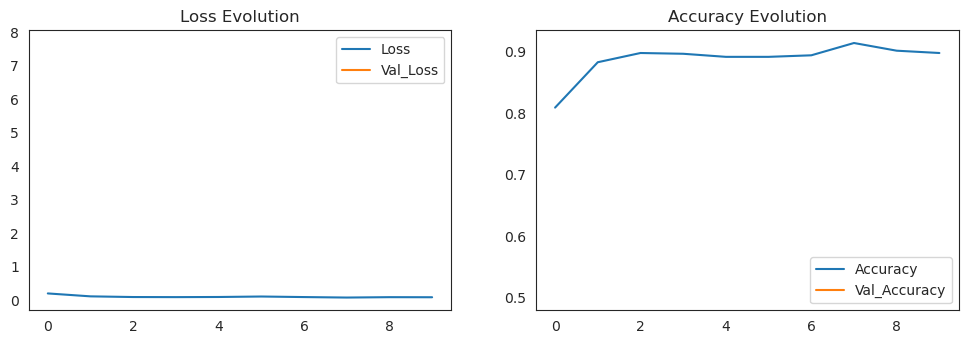

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [25]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 19s 30ms/step - loss: 1.5109 - accuracy: 0.6971
Test Accuracy: 69.71%
652/652 [==============================] - 112s 172ms/step - loss: 0.4168 - accuracy: 0.8622
Train Accuracy: 86.22%


# Evaluation

In [26]:
predicted_vals = model.predict(test, steps=len(test))

624/624 [==============================] - 20s 30ms/step


In [27]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[ 55 179]
 [  1 389]]


0           1  accuracy   macro avg  weighted avg
precision    0.982143    0.684859  0.711538    0.833501      0.796341
recall       0.235043    0.997436  0.711538    0.616239      0.711538
f1-score     0.379310    0.812109  0.711538    0.595709      0.649809
support    234.000000  390.000000  0.711538  624.000000    624.000000

# VGG16

In [28]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')


58889256/58889256 [==============================] - 0s 0us/step


In [29]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [30]:
 vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [34]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [35]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 [==============================] - 30s 198ms/step - loss: 0.2396 - accuracy: 0.6787 - precision: 0.9095 - recall: 0.6284 - val_loss: 17.3093 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 18s 180ms/step - loss: 0.2283 - accuracy: 0.7125 - precision: 0.8957 - recall: 0.6936
Epoch 3/10
100/100 [==============================] - 19s 191ms/step - loss: 0.1968 - accuracy: 0.7675 - precision: 0.9177 - recall: 0.7474
Epoch 4/10
100/100 [==============================] - 18s 182ms/step - loss: 0.1804 - accuracy: 0.7650 - precision: 0.9391 - recall: 0.7297
Epoch 5/10
100/100 [==============================] - 19s 191ms/step - loss: 0.1976 - accuracy: 0.7638 - precision: 0.9182 - recall: 0.7508
Epoch 6/10
100/100 [==============================] - 19s 193ms/step - loss: 0.1797 - accuracy: 0.7375 - precision: 0.9129 - recall: 0.7114
Epoch 7/10
100/100 [==============================] - 18s 181ms/

Text(0.5, 1.0, 'Accuracy Evolution')

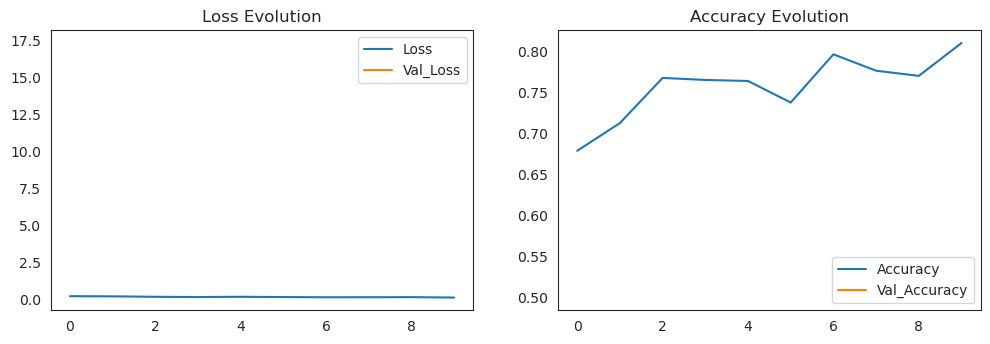

In [36]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [37]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 14s 23ms/step - loss: 1.2072 - accuracy: 0.6346 - precision: 0.6324 - recall: 0.9923
Test Accuracy: 63.46%
652/652 [==============================] - 113s 173ms/step - loss: 0.5092 - accuracy: 0.7811 - precision: 0.7763 - recall: 0.9907
Train Accuracy: 78.11%


# ResNet

In [38]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


In [39]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']      

In [44]:
resnet_model = tf.keras.Sequential([
resnet_base_model,
GlobalAveragePooling2D(),
Dense(512, activation="relu"),
BatchNormalization(),
Dropout(0.6),
Dense(128, activation="relu"),
BatchNormalization(),
Dropout(0.4),
Dense(64,activation="relu"),
BatchNormalization(),
Dropout(0.3),
Dense(1,activation="sigmoid")
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
    'accuracy',
tf.keras.metrics.Precision(name='precision'),
tf.keras.metrics.Recall(name='recall')
]
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [45]:
r = resnet_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 [==============================] - 56s 202ms/step - loss: 0.2623 - accuracy: 0.6375 - precision: 0.8793 - recall: 0.5970 - val_loss: 6.1274 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/10
100/100 [==============================] - 20s 197ms/step - loss: 0.2497 - accuracy: 0.6500 - precision: 0.8679 - recall: 0.6216
Epoch 3/10
100/100 [==============================] - 18s 180ms/step - loss: 0.2596 - accuracy: 0.6363 - precision: 0.8503 - recall: 0.6250
Epoch 4/10
100/100 [==============================] - 19s 187ms/step - loss: 0.2042 - accuracy: 0.7237 - precision: 0.9120 - recall: 0.7025
Epoch 5/10
100/100 [==============================] - 19s 185ms/step - loss: 0.1881 - accuracy: 0.7650 - precision: 0.9187 - recall: 0.7533
Epoch 6/10
100/100 [==============================] - 19s 188ms/step - loss: 0.1728 - accuracy: 0.8025 - precision: 0.9256 - recall: 0.7860
Epoch 7/10
100/100 [==============================] - 19s 191ms/step - lo

Text(0.5, 1.0, 'Accuracy Evolution')

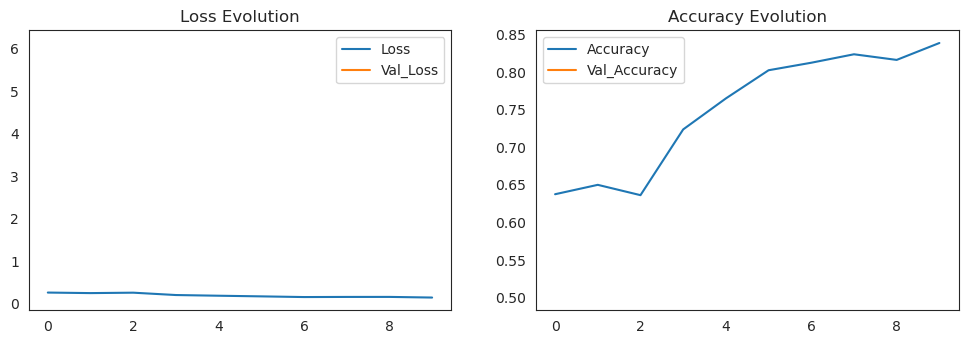

In [46]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [47]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 17s 27ms/step - loss: 0.5762 - accuracy: 0.6859 - precision: 0.6667 - recall: 0.9949
Test Accuracy: 68.59%
652/652 [==============================] - 112s 172ms/step - loss: 0.3789 - accuracy: 0.8322 - precision: 0.8243 - recall: 0.9840
Train Accuracy: 83.22%


# InceptionNet

In [48]:
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')

87910968/87910968 [==============================] - 1s 0us/step


In [51]:
inception_model = tf.keras.Sequential([
inception_base_model,
GlobalAveragePooling2D(),
Dense(512, activation="relu"),
BatchNormalization(),
Dropout(0.6),
Dense(128, activation="relu"),
BatchNormalization(),
Dropout(0.4),
Dense(64,activation="relu"),
BatchNormalization(),
Dropout(0.3),
Dense(1,activation="sigmoid")
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
'accuracy',
tf.keras.metrics.Precision(name='precision'),
tf.keras.metrics.Recall(name='recall')
]
inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [52]:
r = inception_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 [==============================] - 60s 214ms/step - loss: 0.2479 - accuracy: 0.6488 - precision: 0.8724 - recall: 0.6299 - val_loss: 78.9679 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 19s 191ms/step - loss: 0.3121 - accuracy: 0.5950 - precision: 0.8032 - recall: 0.5997
Epoch 3/10
100/100 [==============================] - 19s 189ms/step - loss: 0.3072 - accuracy: 0.5587 - precision: 0.7681 - recall: 0.5870
Epoch 4/10
100/100 [==============================] - 18s 182ms/step - loss: 0.2702 - accuracy: 0.5775 - precision: 0.8071 - recall: 0.5688
Epoch 5/10
100/100 [==============================] - 19s 189ms/step - loss: 0.2289 - accuracy: 0.6988 - precision: 0.8787 - recall: 0.6965
Epoch 6/10
100/100 [==============================] - 18s 182ms/step - loss: 0.2021 - accuracy: 0.7387 - precision: 0.8986 - recall: 0.7306
Epoch 7/10
100/100 [==============================] - 19s 192ms/

Text(0.5, 1.0, 'Accuracy Evolution')

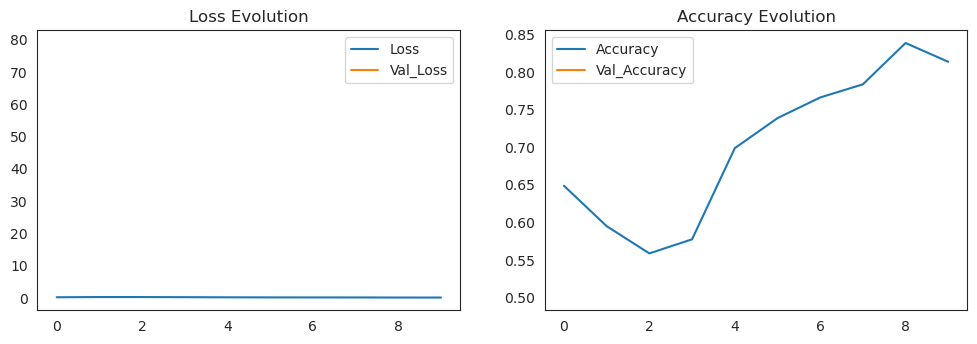

In [53]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [54]:
evaluation =inception_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = inception_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 17s 27ms/step - loss: 0.5146 - accuracy: 0.8237 - precision: 0.7991 - recall: 0.9590
Test Accuracy: 82.37%
652/652 [==============================] - 109s 167ms/step - loss: 0.2484 - accuracy: 0.9212 - precision: 0.9684 - recall: 0.9241
Train Accuracy: 92.12%
